# HUMAN ACTIVITY RECOGNITION 
## IMPORTING LIBRARIES

In [53]:
# General libraries

import csv 
import pandas as pd
from pandas import DataFrame 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import *

# Feature Selection

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# Modelling Algorithms

from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier 

## CALLING THE DATASET

In [3]:
df_train = pd.DataFrame.from_csv('train.csv')
df_test = pd.DataFrame.from_csv('test.csv')

In [4]:
print(df_train.shape)
print(df_test.shape)

(7352, 562)
(2947, 562)


In [4]:
# Replacing strings with numericals for better classification

df_train = df_train.replace('LAYING','1')
df_train = df_train.replace('SITTING','2')
df_train = df_train.replace('STANDING','3')
df_train= df_train.replace('WALKING','4')
df_train = df_train.replace('WALKING_DOWNSTAIRS','5')
df_train = df_train.replace('WALKING_UPSTAIRS','6')

df_test = df_test.replace('LAYING','1')
df_test = df_test.replace('SITTING','2')
df_test = df_test.replace('STANDING','3')
df_test=  df_test.replace('WALKING','4')
df_test = df_test.replace('WALKING_DOWNSTAIRS','5')
df_test = df_test.replace('WALKING_UPSTAIRS','6')


## FEATURE SELECTION USING RECURSIVE FEATURE ELIMINATION

In [6]:
target = df_train.Activity
df_train = df_train.drop(['Activity'],axis=1)
features = df_train.columns


estimator = LinearRegression()
selector = RFE(estimator , 22 , step=1 )
selector = selector.fit(df_train,target)
features = df_train.columns
ranking = selector.ranking_

a = (sorted(zip(map(float, ranking), features)))


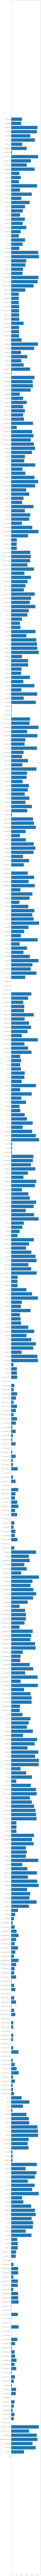

In [57]:
# The graphical representation of each feature with its corresponding rank
# x-axis - rank
# y-axis - feature

plt.figure(figsize = (10,900))
plt.barh(features,ranking)
plt.show()

In [8]:
## Grouping all the features that has rank more than 251 to remove it from the original dataset

f = []
rows = np.arange(561)
for i in rows :
    b = a[i]
    print(b)
    if b[0] > 251:
        f.append(b[1])
    else :
        print('Feature important')
        
        
    

(1.0, 'fBodyAcc-bandsEnergy()-25,32.1')
Feature important
(1.0, 'fBodyAcc-bandsEnergy()-25,48.1')
Feature important
(1.0, 'fBodyAcc-bandsEnergy()-33,40.1')
Feature important
(1.0, 'fBodyAcc-bandsEnergy()-33,48.1')
Feature important
(1.0, 'fBodyAcc-bandsEnergy()-41,48.1')
Feature important
(1.0, 'fBodyAccJerk-bandsEnergy()-17,24')
Feature important
(1.0, 'fBodyAccJerk-bandsEnergy()-17,24.2')
Feature important
(1.0, 'fBodyAccJerk-bandsEnergy()-17,32')
Feature important
(1.0, 'fBodyAccJerk-bandsEnergy()-17,32.2')
Feature important
(1.0, 'fBodyAccJerk-bandsEnergy()-25,32.2')
Feature important
(1.0, 'fBodyAccJerk-bandsEnergy()-25,48')
Feature important
(1.0, 'fBodyAccJerk-bandsEnergy()-33,40')
Feature important
(1.0, 'fBodyAccJerk-bandsEnergy()-33,48')
Feature important
(1.0, 'fBodyAccJerk-bandsEnergy()-41,48')
Feature important
(1.0, 'fBodyGyro-bandsEnergy()-1,16.1')
Feature important
(1.0, 'fBodyGyro-bandsEnergy()-1,24')
Feature important
(1.0, 'fBodyGyro-bandsEnergy()-1,8.1')
Feature imp

In [9]:
# Dropping of those columns

df_train = df_train.drop(f,axis=1)
df_test = df_test.drop(f,axis=1)

In [12]:
df_train.head(2)

,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,...,fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-energy(),"angle(X,gravityMean)","angle(Z,gravityMean)"
tBodyAcc-mean()-X,,,,,,,,,,,,,,,,,,,,,
0.288585,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.965523,-0.999945,-0.999863,-0.994612,...,-0.980135,-0.961309,-0.952264,-0.980135,-0.999240,-0.992656,-0.989941,-0.999937,-0.841247,-0.058627
0.278419,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.981930,-0.999991,-0.999788,-0.998405,...,-0.988296,-0.983322,-0.986321,-0.988296,-0.999811,-0.993979,-0.995442,-0.999981,-0.844788,-0.054317


### <i> The number of columns has reduced.

## BALANCED OR IMBALANCED DATASET 

In [132]:
plt.hist(x=df_train.Activity)

(array([ 1407.,     0.,  1286.,     0.,  1374.,     0.,  1226.,     0.,
          986.,  1073.]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ]),
 <a list of 10 Patch objects>)

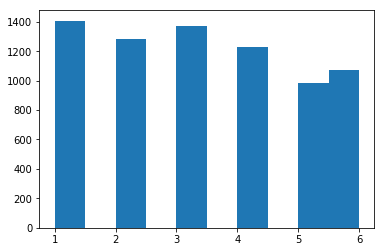

In [127]:
plt.show()

## CLASSIFICATION - MULTI-LABEL

In [10]:
# Creating the target variable for the test dataset

target_t = df_test.Activity

df_test = df_test.drop('Activity',axis=1)


### 1. NAIVE BAYES -BERNOULLI

In [44]:
# Train dataset

nb_b = BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
nb_b_train = nb_b.fit(df_train,target)
nb_b_predict_train = nb_b.predict(df_train)

# Calculating Metrics

score_nb_b_train = accuracy_score(target,nb_b_predict_train )
cm_predict_train = confusion_matrix(target,nb_b_predict_train )
print(score_nb_b_train)
print(cm_predict_train)

0.787540805223
[[1404    0    0    0    2    1]
 [   8  944  332    0    0    2]
 [   0  114 1257    2    0    1]
 [   0   22  159  735  111  199]
 [   0    0   49   92  766   79]
 [   0   11   78  244   56  684]]


In [45]:
# Test dataset

nb_b_test = nb_b.fit(df_test,target_t)
nb_b_predict_test = nb_b.predict(df_test)

# Calculating Metrics

score_nb_b_test = accuracy_score(target_t,nb_b_predict_test)
cm_predict_test= confusion_matrix(target_t,nb_b_predict_test)
print(score_nb_b_test)
print(cm_predict_test)

0.757041058704
[[537   0   0   0   0   0]
 [  0 334 153   0   1   3]
 [  0  50 480   0   0   2]
 [  0   4  15 189  49 239]
 [  0   0   5  38 265 112]
 [  0   0  15  17  13 426]]


### 2.NAIVE BAYES - GAUSSIAN

In [47]:
# Train dataset

nb_g =  GaussianNB()
nb_g_train = nb_g.fit(df_train,target)
nb_g_predict_train = nb_g.predict(df_train)

# Calculating Metrics

score_g_train = accuracy_score(target,nb_g_predict_train)
cm_g_train = confusion_matrix(target,nb_g_predict_train)
print(score_g_train)
print(cm_g_train)

0.667029379761
[[ 216 1172    0    0    0   19]
 [  10 1038  218    0    0   20]
 [   0  226 1115    2    0   31]
 [   0    0    0  843  138  245]
 [   0    0    0   55  732  199]
 [   0    0    0   30   83  960]]


In [48]:
# Test dataset

nb_g_test = nb_g.fit(df_test,target_t)
nb_g_predict_test = nb_g.predict(df_test)

# Calculating Metrics

score_g_test = accuracy_score(target_t,nb_g_predict_test)
cm_g_test = confusion_matrix(target_t,nb_g_predict_test)
print(score_g_test)
print(cm_g_test)

0.73023413641
[[529   0   0   0   0   8]
 [  0 458  24   0   0   9]
 [  0 401 119   1   0  11]
 [  0   0   0 317  60 119]
 [  0   0   0  43 301  76]
 [  0   0   0  16  27 428]]


### 3. DECISION TREEE CLASSIFIER

In [51]:
# Training Dataset

dtc = DecisionTreeClassifier(max_depth = 250)
dtc_train = dtc.fit(df_train , target)
dtc_predict_train = dtc.predict(df_train)

# Calculating Metrics

score_train = accuracy_score(target , dtc_predict_train)
cm_train = confusion_matrix(target ,dtc_predict_train)
print(score_train)
print(cm_train)

1.0
[[1407    0    0    0    0    0]
 [   0 1286    0    0    0    0]
 [   0    0 1374    0    0    0]
 [   0    0    0 1226    0    0]
 [   0    0    0    0  986    0]
 [   0    0    0    0    0 1073]]


In [52]:
# Training Dataset

dtc_test = dtc.fit(df_test , target_t)
dtc_predict_test = dtc.predict(df_test)

# Calculating Metrics

score_test = accuracy_score(target_t , dtc_predict_test)
cm_test = confusion_matrix(target_t ,dtc_predict_test)
print(score_test)
print(cm_test)

1.0
[[537   0   0   0   0   0]
 [  0 491   0   0   0   0]
 [  0   0 532   0   0   0]
 [  0   0   0 496   0   0]
 [  0   0   0   0 420   0]
 [  0   0   0   0   0 471]]


### 4. RANDOM FOREST

In [55]:
# Training Dataset 

RFC = RandomForestClassifier(max_depth=25,random_state=0)
rfc_train = RFC.fit(df_train , target)
rfc_predict_train = RFC.predict(df_train)

# Calculating Metrics

score_train_rfc = accuracy_score(target ,rfc_predict_train)
cm_train_rfc =  confusion_matrix(target , rfc_predict_train)
print(score_train_rfc)
print(cm_train_rfc )

0.999455930359
[[1407    0    0    0    0    0]
 [   0 1284    2    0    0    0]
 [   0    1 1373    0    0    0]
 [   0    0    0 1226    0    0]
 [   0    0    0    1  985    0]
 [   0    0    0    0    0 1073]]


In [56]:
# Test Dataset 

rfc_test = RFC.fit(df_test , target_t)
rfc_predict_test = RFC.predict(df_test)

# Calculating Metrics

score_test_rfc = accuracy_score(target_t ,rfc_predict_test)
cm_test_rfc =  confusion_matrix(target_t , rfc_predict_test)
print(score_test_rfc)
print(cm_test_rfc )

0.998642687479
[[537   0   0   0   0   0]
 [  0 490   1   0   0   0]
 [  0   2 530   0   0   0]
 [  0   0   0 496   0   0]
 [  0   0   0   1 419   0]
 [  0   0   0   0   0 471]]


### 5.KNEAREST CLASSIFIER

In [57]:
# Training Dataset

knc = KNeighborsClassifier(n_neighbors=6)
knc_train = knc.fit(df_train , target)
knc_predict_train = knc.predict(df_train)

# Calculating Metrics

score_knc_train = accuracy_score(target,knc_predict_train)
cm_knc_train = confusion_matrix(target,knc_predict_train)
print(score_knc_train)
print(cm_knc_train)

0.979189336235
[[1407    0    0    0    0    0]
 [   0 1224   60    0    0    2]
 [   0   77 1297    0    0    0]
 [   0    0    0 1224    0    2]
 [   0    0    0    3  979    4]
 [   0    0    0    5    0 1068]]


In [58]:
# Test Dataset 

knc_test = knc.fit(df_test , target_t)
knc_predict_test = knc.predict(df_test)

# Calculating Metrics

score_knc_test = accuracy_score(target_t,knc_predict_test)
cm_knc_test = confusion_matrix(target_t,knc_predict_test)
print(score_knc_test)
print(cm_knc_test)

0.973532405836
[[537   0   0   0   0   0]
 [  0 472  19   0   0   0]
 [  0  47 485   0   0   0]
 [  0   0   0 494   0   2]
 [  0   0   0   8 412   0]
 [  0   0   0   1   1 469]]


### 6.SVM 

In [14]:
# Training dataset

svc = LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)
svc_train = svc.fit(df_train ,target)
svc_predict_train =svc.predict(df_train)

# Calculating metrics

score_svc_train = accuracy_score(target,svc_predict_train)
cm_svc_train = confusion_matrix(target,svc_predict_train)
print(score_svc_train)
print(cm_svc_train)

0.977421109902
[[1407    0    0    0    0    0]
 [   0 1186  100    0    0    0]
 [   0   64 1310    0    0    0]
 [   0    0    0 1224    0    2]
 [   0    0    0    0  986    0]
 [   0    0    0    0    0 1073]]


In [15]:
# Test dataset 

svc_test = svc.fit(df_test ,target_t)
svc_predict_test =svc.predict(df_test)

# Calculating metrics

score_svc_test = accuracy_score(target_t,svc_predict_test)
cm_svc_test = confusion_matrix(target_t,svc_predict_test)
print(score_svc_test)
print(cm_svc_test)

0.9776043434
[[536   1   0   0   0   0]
 [  0 457  34   0   0   0]
 [  0  31 501   0   0   0]
 [  0   0   0 496   0   0]
 [  0   0   0   0 420   0]
 [  0   0   0   0   0 471]]


### 7.NEURAL NETWORKS

In [40]:
# Training dataset

mlp = MLPClassifier(hidden_layer_sizes=(200,70,30), activation='tanh', solver='adam', alpha=0.5)
mlp_train = mlp.fit(df_train , target)
mlp_predict_train = mlp.predict(df_train)

# Calculating metrics

score_mlp_train = accuracy_score(target,mlp_predict_train)
cm_mlp_train = confusion_matrix(target,mlp_predict_train)
print(score_mlp_train)
print(cm_mlp_train)

0.95810663765
[[1407    0    0    0    0    0]
 [   0 1233   52    0    0    1]
 [   0  219 1155    0    0    0]
 [   0    0    0 1215    5    6]
 [   0    0    0    0  986    0]
 [   0    0    0   11   14 1048]]


In [39]:
# Training dataset

mlp_test = mlp.fit(df_test , target_t)
mlp_predict_test = mlp.predict(df_test)

#Calculating metrics

score_mlp_test = accuracy_score(target_t,mlp_predict_test)
cm_mlp_test = confusion_matrix(target_t,mlp_predict_test)
print(score_mlp_test)
print(cm_mlp_test)

0.959619952494
[[537   0   0   0   0   0]
 [  0 444  47   0   0   0]
 [  0  61 471   0   0   0]
 [  0   0   0 489   3   4]
 [  0   0   0   0 420   0]
 [  0   0   0   0   4 467]]


### CREATING A DATAFRAME OUT OF THE ACCURACY METRICS

In [86]:
accuracy_metrics = {'TRAIN ACCURACY SCORE_BERNOULLI':score_nb_b_train,'TEST ACCURACY SCORE_BERNOULLI':score_nb_b_test,
                    'TRAIN ACCURACY SCORE_GAUSSIAN' :score_g_train,'TEST ACCURACY SCORE_GAUSSIAN':score_g_train,
                    'TRAIN ACCURACY SCORE_DECISION_TREE' :score_train,'TEST ACCURACY SCORE_DECISION_TREE' :score_test,
                    'TRAIN ACCURACY SCORE_RANDOM_FOREST' :score_test_rfc,'TEST ACCURACY SCORE_RANDOM_FOREST' :score_test_rfc,
                    'TRAIN ACCURACY SCORE_KNN' :score_knc_train,'TEST ACCURACY SCORE_KNN' :score_knc_test,
                    'TRAIN ACCURACY SCORE_SVM' :score_svc_train,'TEST ACCURACY SCORE_SVM' :score_svc_test,
                    'TRAIN ACCURACY SCORE_MLP' :score_mlp_train,'TEST ACCURACY SCORE_MLP' :score_mlp_test}

In [87]:
pd.DataFrame.from_dict(accuracy_metrics,orient='Index').to_csv('metrics.csv')

In [92]:
metrics = pd.DataFrame.from_csv('metrics.csv')

In [93]:
# The dataframe 

metrics

,0
TRAIN ACCURACY SCORE_BERNOULLI,0.787541
TEST ACCURACY SCORE_BERNOULLI,0.757041
TRAIN ACCURACY SCORE_GAUSSIAN,0.667029
TEST ACCURACY SCORE_GAUSSIAN,0.667029
TRAIN ACCURACY SCORE_DECISION_TREE,1.000000
TEST ACCURACY SCORE_DECISION_TREE,1.000000
TRAIN ACCURACY SCORE_RANDOM_FOREST,0.998643
TEST ACCURACY SCORE_RANDOM_FOREST,0.998643
TRAIN ACCURACY SCORE_KNN,0.979189
TEST ACCURACY SCORE_KNN,0.973532


### <i> From the above dataframe it is clear that DECISION TREE CLASSIFIER has proved to be the best among other classification algorithms.